In this notebook, we're going to train a LSTM to do time-series prediction. Given some set of input data, it should be able to generate a prediction for the next time step!

In [31]:
# import libraries

import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y')

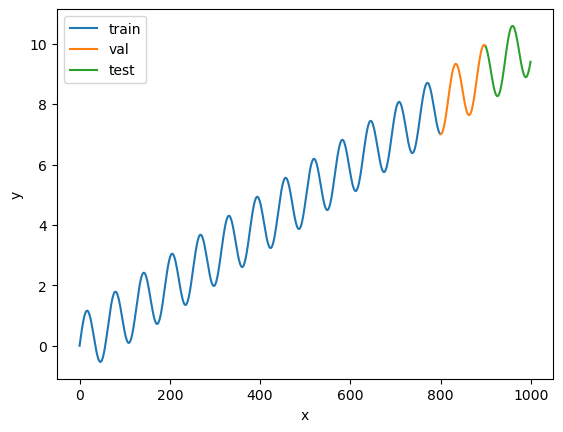

In [32]:
x = np.arange(1000)
y = np.array([np.sin(a/10) + 0.01*a for a in x])

x_train, x_val, x_test = x[:800], x[800:900], x[900:]
y_train, y_val, y_test = y[:800], y[800:900], y[900:]

plt.plot(x_train, y_train, label='train')
plt.plot(x_val, y_val, label='val')
plt.plot(x_test, y_test, label='test')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [33]:
# create LSTM model to train on the above time series data
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, input_seq):
        lstm_out, _ = self.lstm(input_seq)
        predictions = self.fc(lstm_out[-1])
        return predictions

# define model hyper parameters
input_size = 1
hidden_size = 4
output_size = 1

# instantiate the model
model = LSTM(input_size, hidden_size, output_size)

# define loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

# convert data to tensors
x_train_tensor = torch.Tensor(x_train).view(-1, 1, 1)
y_train_tensor = torch.Tensor(y_train).view(-1, 1)
x_val_tensor = torch.Tensor(x_val).view(-1, 1, 1)
y_val_tensor = torch.Tensor(y_val).view(-1, 1)

# define training function
def train_model(model, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor, criterion, optimizer, epochs=100):
    train_losses = []
    val_losses = []
    for epoch in range(epochs):
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward pass
        train_pred = model(x_train_tensor)
        train_loss = criterion(train_pred, y_train_tensor)
        val_pred = model(x_val_tensor)
        val_loss = criterion(val_pred, y_val_tensor)

        # backward pass
        train_loss.backward()
        optimizer.step()

        # print statistics
        if epoch % 10 == 0:
            print('Epoch: {}/{}..'.format(epoch, epochs),
                  'Training Loss: {:.3f}..'.format(train_loss.item()),
                  'Validation Loss: {:.3f}..'.format(val_loss.item()))

        train_losses.append(train_loss.item())
        val_losses.append(val_loss.item())

    print('Finished Training')
    return train_losses, val_losses

# train the model
train_losses, val_losses = train_model(model, x_train_tensor, y_train_tensor, x_val_tensor, y_val_tensor, criterion, optimizer, epochs=100)

/opt/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([800, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/opt/anaconda3/envs/pytorch_env/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0/100.. Training Loss: 23.956.. Validation Loss: 77.743..
Epoch: 10/100.. Training Loss: 6.035.. Validation Loss: 26.186..
Epoch: 20/100.. Training Loss: 6.971.. Validation Loss: 12.282..
Epoch: 30/100.. Training Loss: 5.844.. Validation Loss: 18.306..
Epoch: 40/100.. Training Loss: 5.903.. Validation Loss: 24.779..
Epoch: 50/100.. Training Loss: 5.752.. Validation Loss: 21.794..
Epoch: 60/100.. Training Loss: 5.771.. Validation Loss: 19.640..
Epoch: 70/100.. Training Loss: 5.746.. Validation Loss: 21.179..
Epoch: 80/100.. Training Loss: 5.748.. Validation Loss: 21.497..
Epoch: 90/100.. Training Loss: 5.746.. Validation Loss: 20.794..
Finished Training
